In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


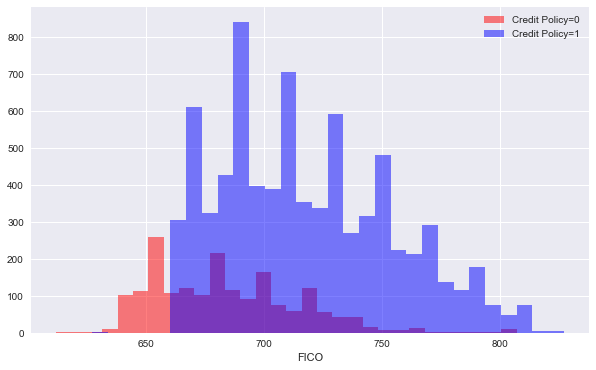

In [6]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==0]['fico'].hist(alpha=0.5, color='r', bins=30, label='Credit Policy=0')
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='b', bins=30,label='Credit Policy=1')
plt.legend()
plt.xlabel('FICO')

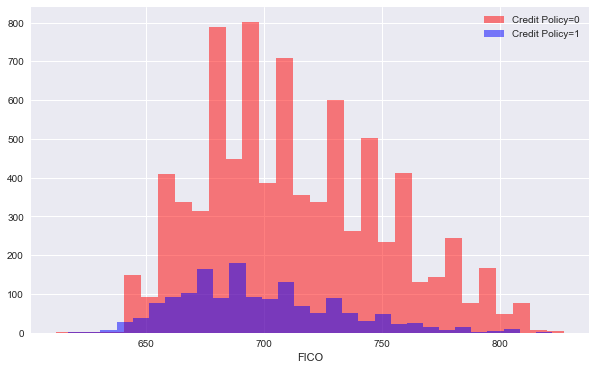

In [7]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='r', bins=30, label='Credit Policy=0')
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='b', bins=30,label='Credit Policy=1')
plt.legend()
plt.xlabel('FICO')

In [8]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

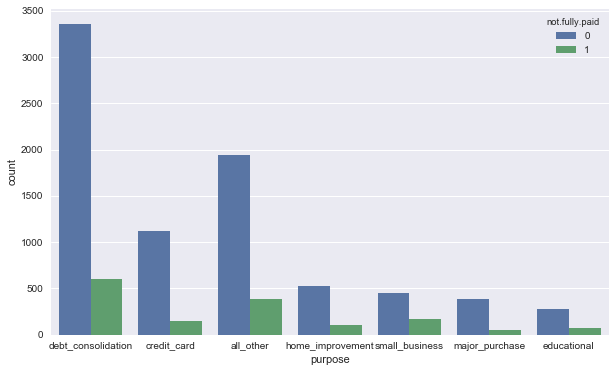

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data=df, hue='not.fully.paid')

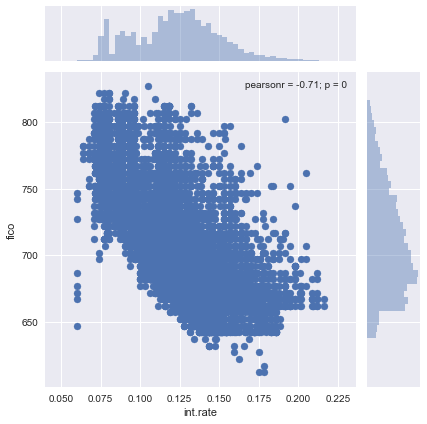

In [10]:
#Checking trend between FICO score and interest rate.
sns.jointplot(x='int.rate', y='fico', data=df)

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

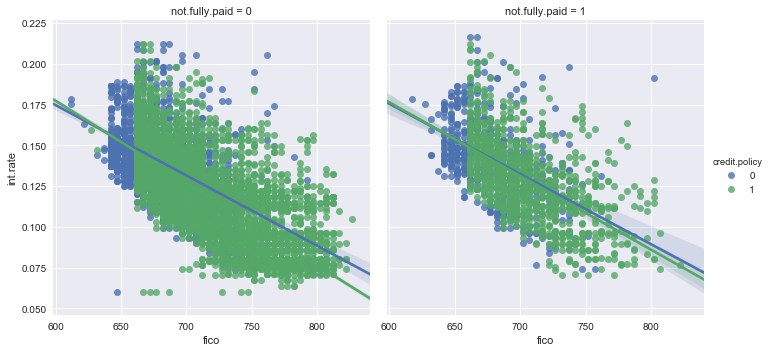

In [11]:
# Checking trend differed between not.fully.paid and credit.policy
sns.lmplot(y='int.rate', x='fico', col='not.fully.paid', hue='credit.policy', data=df)

In [12]:
#Removing categorical data, df['purpose']
final_data=pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=final_data.drop('not.fully.paid', axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree=DecisionTreeClassifier()

In [17]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
pred=dtree.predict(X_test)

In [20]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2650
          1       0.21      0.22      0.21       511

avg / total       0.74      0.74      0.74      3161



In [21]:
print(confusion_matrix(y_test,pred))

[[2227  423]
 [ 401  110]]


In [22]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier

In [23]:
rdc=RandomForestClassifier()

In [24]:
rdc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
predi=rdc.predict(X_test)

In [26]:
print(classification_report(y_test, predi))

             precision    recall  f1-score   support

          0       0.84      0.98      0.91      2650
          1       0.33      0.05      0.08       511

avg / total       0.76      0.83      0.77      3161



In [27]:
print(confusion_matrix(y_test, predi))

[[2603   47]
 [ 488   23]]
